## Load & Preparing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
import scipy.stats
import os
from tqdm import tqdm


%matplotlib inline
warnings.filterwarnings('ignore')

Dataset: World Happiness Report

In [2]:
happiness = pd.read_csv('./dataset/happiness/2015.csv')
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Checking null values

In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Subsample 3-5 Variables
Subsampling 4 variables: Happiness Score, Family, Generosity, Dystopia Residual

In [4]:
happiness = happiness[['Happiness Score', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
happiness.head()

,Happiness Score,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.41978,0.29678,2.51738
1,7.561,0.14145,0.43630,2.70201
2,7.527,0.48357,0.34139,2.49204
3,7.522,0.36503,0.34699,2.46531
4,7.427,0.32957,0.45811,2.45176


## Non-Parametric Estimation
Plot PDF in histogram and using KDE for each variables

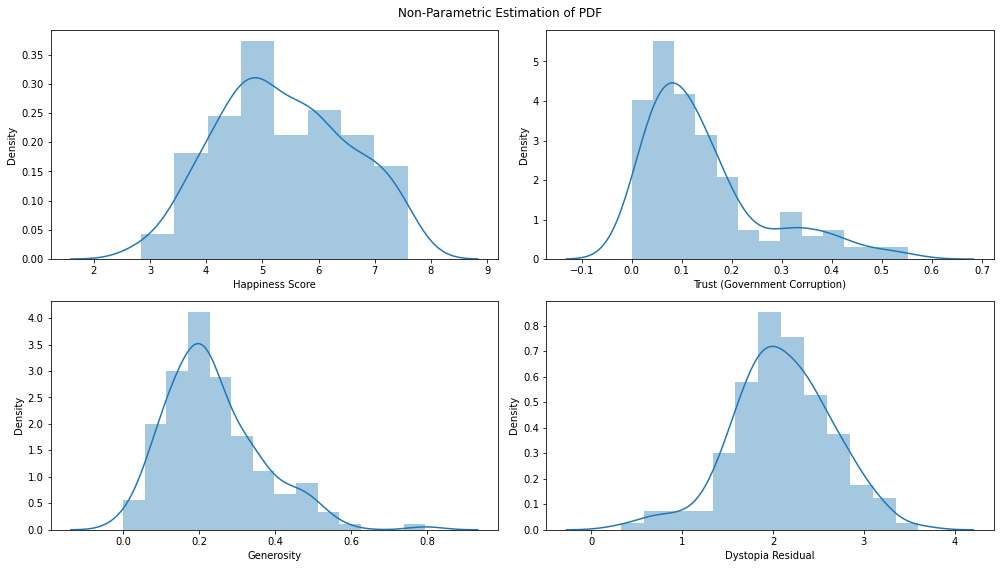

In [5]:
# initialize figure canvas
fig, ax = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle('Non-Parametric Estimation of PDF')

# plot Happiness variable
sns.distplot(happiness['Happiness Score'], ax=ax[0,0], kde=True)

# plot Trust (Government Corruption) variable
sns.distplot(happiness['Trust (Government Corruption)'], ax=ax[0,1], kde=True)

# plot Generosity variable
sns.distplot(happiness['Generosity'], ax=ax[1,0], kde=True)

# plot Dystopia variable
sns.distplot(happiness['Dystopia Residual'], ax=ax[1,1], kde=True)

plt.tight_layout()
plt.show()

## Estimation of Order Statistics
Represent order of statistics as box-whisker plot

In [6]:
_happiness = happiness['Happiness Score'].to_numpy()
_trust = happiness['Trust (Government Corruption)'].to_numpy()
_generosity = happiness['Generosity'].to_numpy()
_dystopia = happiness['Dystopia Residual'].to_numpy()


# order statistics Happiness variable
happiness_quantiles = [np.quantile(_happiness, 0.1), np.quantile(_happiness, 0.25), np.quantile(_happiness, 0.5), np.quantile(_happiness, 0.75), np.quantile(_happiness, 0.9)]

# order statistics Trust (Government Corruption) variable
trust_quantiles = [np.quantile(_trust, 0.1), np.quantile(_trust, 0.25), np.quantile(_trust, 0.5), np.quantile(_trust, 0.75), np.quantile(_trust, 0.9)]

# order statistics Generosity variable
generosity_quantiles = [np.quantile(_generosity, 0.1), np.quantile(_generosity, 0.25), np.quantile(_generosity, 0.5), np.quantile(_generosity, 0.75), np.quantile(_generosity, 0.9)]

# order statistics Dystopia variable
dystopia_quantiles = [np.quantile(_dystopia, 0.1), np.quantile(_dystopia, 0.25), np.quantile(_dystopia, 0.5), np.quantile(_dystopia, 0.75), np.quantile(_dystopia, 0.9)]


print('happiness: ', happiness_quantiles)
print('trust: ', trust_quantiles)
print('generosity: ', generosity_quantiles)
print('dystopia: ', dystopia_quantiles)

happiness:  [3.9015999999999997, 4.526, 5.2325, 6.24375, 6.9571000000000005]
trust:  [0.028650000000000002, 0.061675, 0.10722000000000001, 0.180255, 0.326539]
generosity:  [0.106185, 0.1505525, 0.21613, 0.3098825, 0.4123720000000001]
dystopia:  [1.456452, 1.75941, 2.095415, 2.462415, 2.801197]


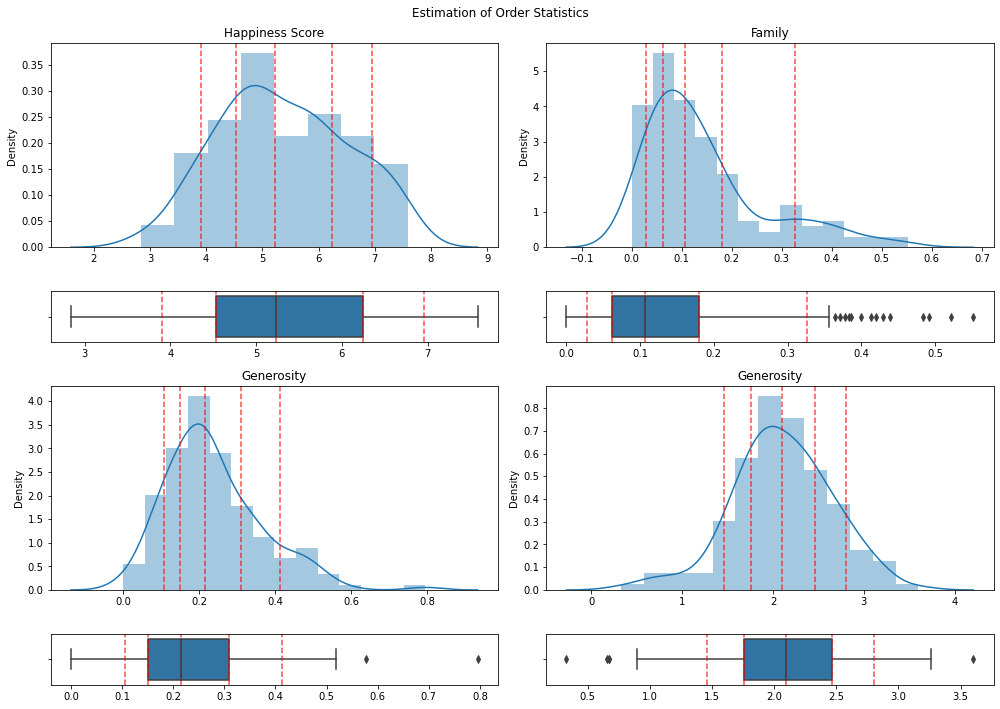

In [43]:
fig, ax = plt.subplots(4,2, figsize=(14,10), sharex=False, gridspec_kw={'height_ratios': [2,0.5,2,0.5]})
fig.suptitle('Estimation of Order Statistics')

# Happiness
# KDE
sns.distplot(_happiness, kde=True, ax=ax[0,0])
for q in happiness_quantiles:
    ax[0,0].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[0,0].set_title('Happiness Score')

# box-whisker plot
sns.boxplot(x=_happiness, ax=ax[1,0])
for q in happiness_quantiles:
    ax[1,0].axvline(q, color='r', linestyle='--', alpha=0.7)


# Family
# KDE
sns.distplot(_trust, kde=True, ax=ax[0,1])
for q in trust_quantiles:
    ax[0,1].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[0,1].set_title('Family')

# box-whisker plot
sns.boxplot(x=_trust, ax=ax[1,1])
for q in trust_quantiles:
    ax[1,1].axvline(q, color='r', linestyle='--', alpha=0.7)


# Generosity
# KDE
sns.distplot(_generosity, kde=True, ax=ax[2,0])
for q in generosity_quantiles:
    ax[2,0].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[2,0].set_title('Generosity')

# box-whisker plot
sns.boxplot(x=_generosity, ax=ax[3,0])
for q in generosity_quantiles:
    ax[3,0].axvline(q, color='r', linestyle='--', alpha=0.7)


# Dystopia
# KDE
sns.distplot(_dystopia, kde=True, ax=ax[2,1])
for q in dystopia_quantiles:
    ax[2,1].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[2,1].set_title('Generosity')

# box-whisker plot
sns.boxplot(x=_dystopia, ax=ax[3,1])
for q in dystopia_quantiles:
    ax[3,1].axvline(q, color='r', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Happiness Score quantiles: , [3.9015999999999997, 4.526, 5.2325, 6.24375, 6.9571000000000005]


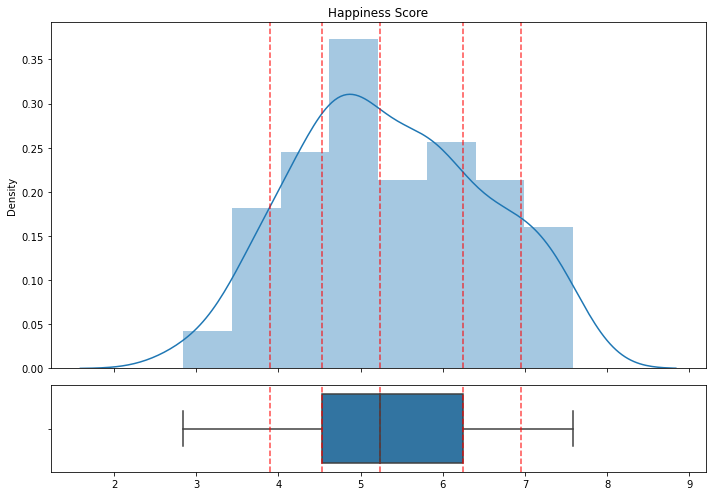

Trust (Government Corruption) quantiles: , [0.028650000000000002, 0.061675, 0.10722000000000001, 0.180255, 0.326539]


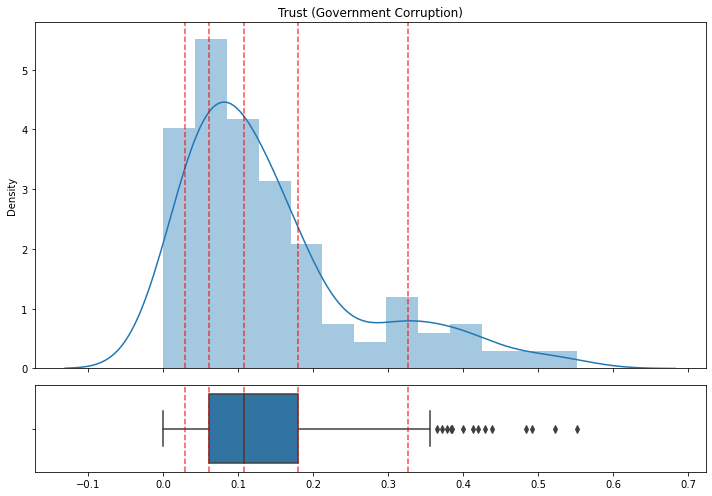

Generosity quantiles: , [0.106185, 0.1505525, 0.21613, 0.3098825, 0.4123720000000001]


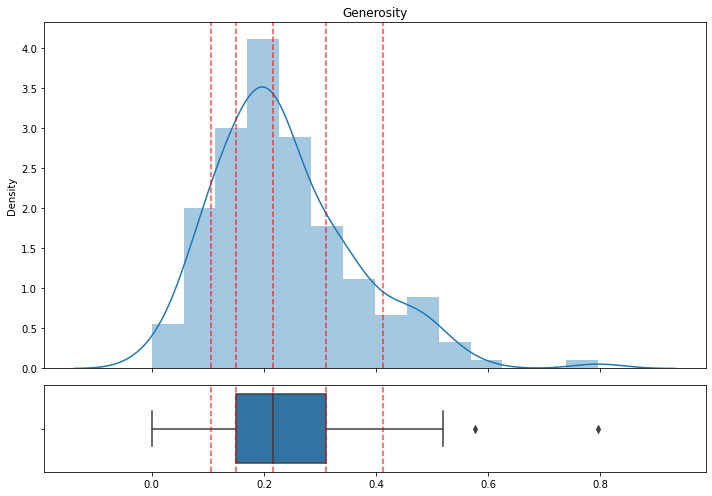

Dystopia Residual quantiles: , [1.456452, 1.75941, 2.095415, 2.462415, 2.801197]


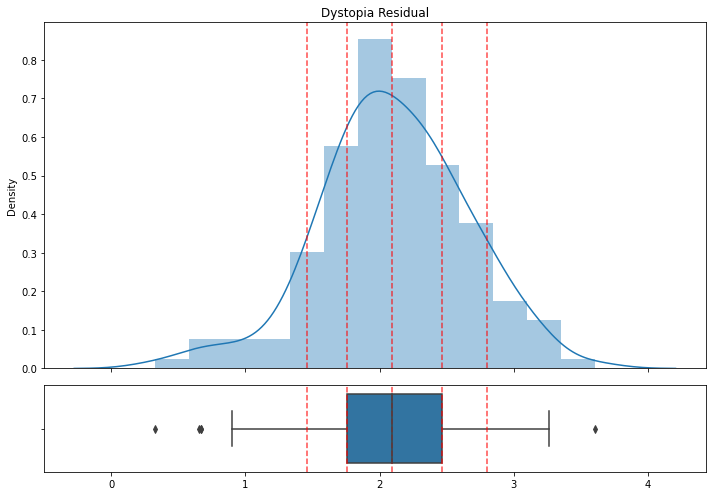

In [13]:
for col in happiness.columns:
    fig, ax = plt.subplots(2,1, figsize=(10,7), sharex=True, gridspec_kw={'height_ratios': [2,0.5]})    

    numvar = happiness[col].to_numpy()

    # order of statistics
    quantiles = [np.quantile(numvar, 0.1), np.quantile(numvar, 0.25), np.quantile(numvar, 0.5), np.quantile(numvar, 0.75), np.quantile(numvar, 0.9)]
    
    print(f'{col} quantiles: , {quantiles}')

    # KDE
    sns.distplot(numvar, kde=True, ax=ax[0])
    for q in quantiles:
        ax[0].axvline(q, color='r', linestyle='--', alpha=0.7)
    ax[0].set_title(f'{col}')

    # box-whisker plot
    sns.boxplot(x=numvar, ax=ax[1])
    for q in quantiles:
        ax[1].axvline(q, color='r', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

## Find theoritical distribution

In [44]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in tqdm(dist_name):    
    dct = {
            'distribution': d
    }
    for c in happiness.columns:
        try:
            dist = getattr(scipy.stats, d)
            
            # original
            feature = happiness[c]
            param = dist.fit(feature)
            _, kstest = scipy.stats.kstest(feature, d, param, N=100)
            _, chisq = scipy.stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

100%|██████████| 98/98 [00:41<00:00,  2.35it/s]


In [46]:
# suitable distribution for happiness
top_happiness = df_dist[df_dist['Happiness Score_kstest'] >= 0.05].sort_values(by=['Happiness Score_kstest'], ascending=False).reset_index()

# suitable distribution for trust
top_trust = df_dist[df_dist['Trust (Government Corruption)_kstest'] >= 0.05].sort_values(by=['Trust (Government Corruption)_kstest'], ascending=False).reset_index()

# suitable distribution for generosity
top_generosity = df_dist[df_dist['Generosity_kstest'] >= 0.05].sort_values(by=['Generosity_kstest'], ascending=False).reset_index()

# suitable distribution for dystopia
top_dystopia = df_dist[df_dist['Dystopia Residual_kstest'] >= 0.05].sort_values(by=['Dystopia Residual_kstest'], ascending=False).reset_index()

In [ ]:
top_happiness.head()

,index,distribution,Happiness Score_params,Happiness Score_kstest,Happiness Score_chi2,Family_params,Family_kstest,Family_chi2,Generosity_params,Generosity_kstest,Generosity_chi2,Dystopia Residual_params,Dystopia Residual_kstest,Dystopia Residual_chi2
0,1,anglit,"(5.333449749621549, 3.3272001127940882)",0.938934,1.0,"(0.833059183071237, 1.0725239285983919)",3.266217e-11,1.0,"(0.3354708196545878, 0.5919164872675287)",4.168347e-15,1.0,"(1.9777534528158054, 2.1310890362528356)",0.000012,1.0
1,80,rice,"(1.8940849120518144, 2.6209103991532086, 1.261...",0.897253,1.0,"(503.3308324492558, -136.1253419362879, 0.2724...",1.704589e-01,1.0,"(0.0008204456244780306, -0.009339481151174396,...",5.820819e-01,1.0,"(137.88082044079914, -73.99121739046484, 0.551...",0.824621,1.0
2,5,betaprime,"(93.4138484692305, 967.6174509995301, -5.13246...",0.860526,1.0,"(1664789.2870406788, 2415324.916075398, -268.2...",1.488368e-01,1.0,"(131.29632897517743, 18.778291229230334, -0.24...",8.988664e-01,1.0,"(579.5954898985369, 9465.897395000851, -10.970...",0.732276,1.0
3,81,recipinvgauss,"(0.010253824611643557, -6.002727229486553, 0.1...",0.858969,1.0,"(0.0024383936889459112, -4.68192487302532, 0.0...",NaN,1.0,"(0.09820398892246193, -0.164364543200836, 0.03...",8.448725e-01,1.0,"(0.11763265766737262, 0.0031976702078729794, 0...",0.011056,1.0
4,74,pearson3,"(0.21914098497054085, 5.375734628705192, 1.143...",0.855453,1.0,"(-1.2983915960651817, 0.9910321132883462, 0.27...",8.982931e-01,1.0,"(0.8292727083149578, 0.23728916361734936, 0.12...",7.712166e-01,1.0,"(-0.18753425521756187, 2.0989727543594885, 0.5...",0.838651,1.0


In [47]:
len(top_happiness), len(top_trust), len(top_generosity), len(top_dystopia)

(62, 50, 59, 58)

In [48]:
def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

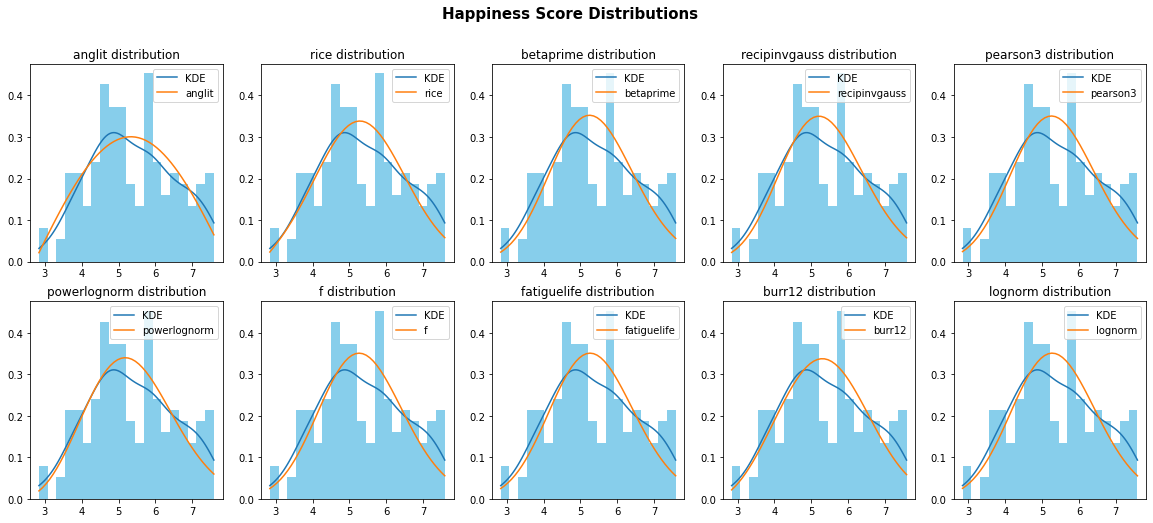

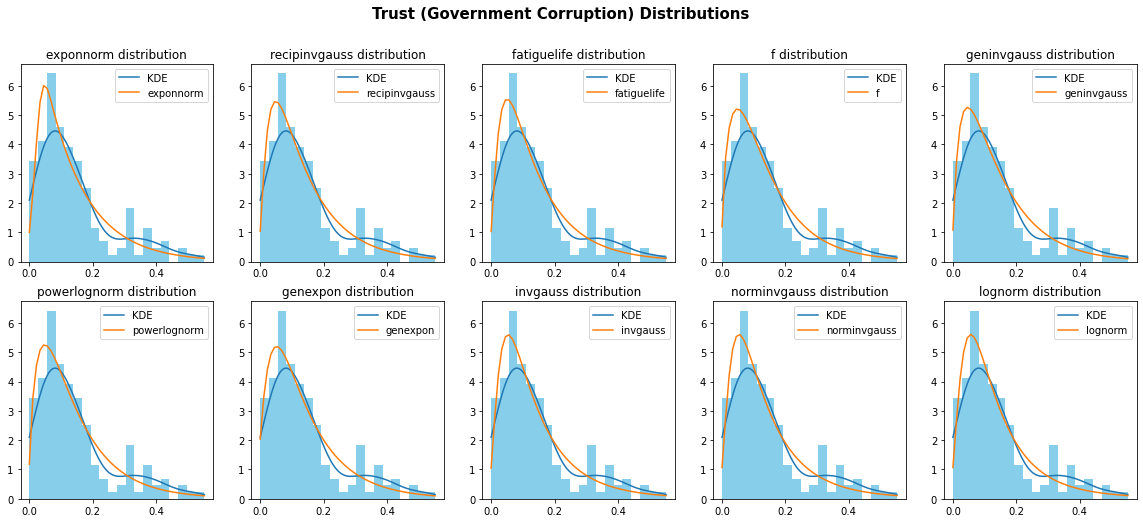

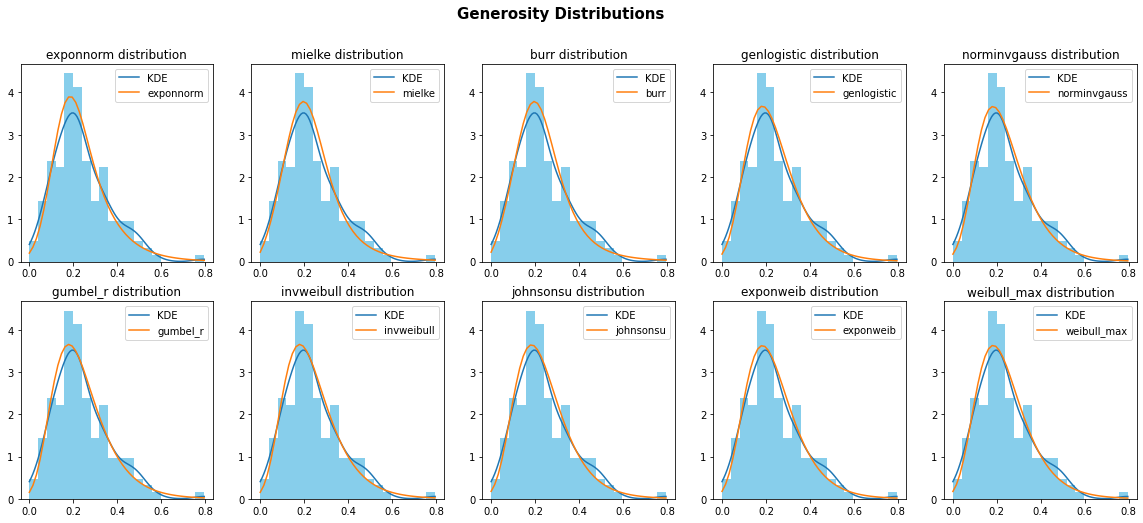

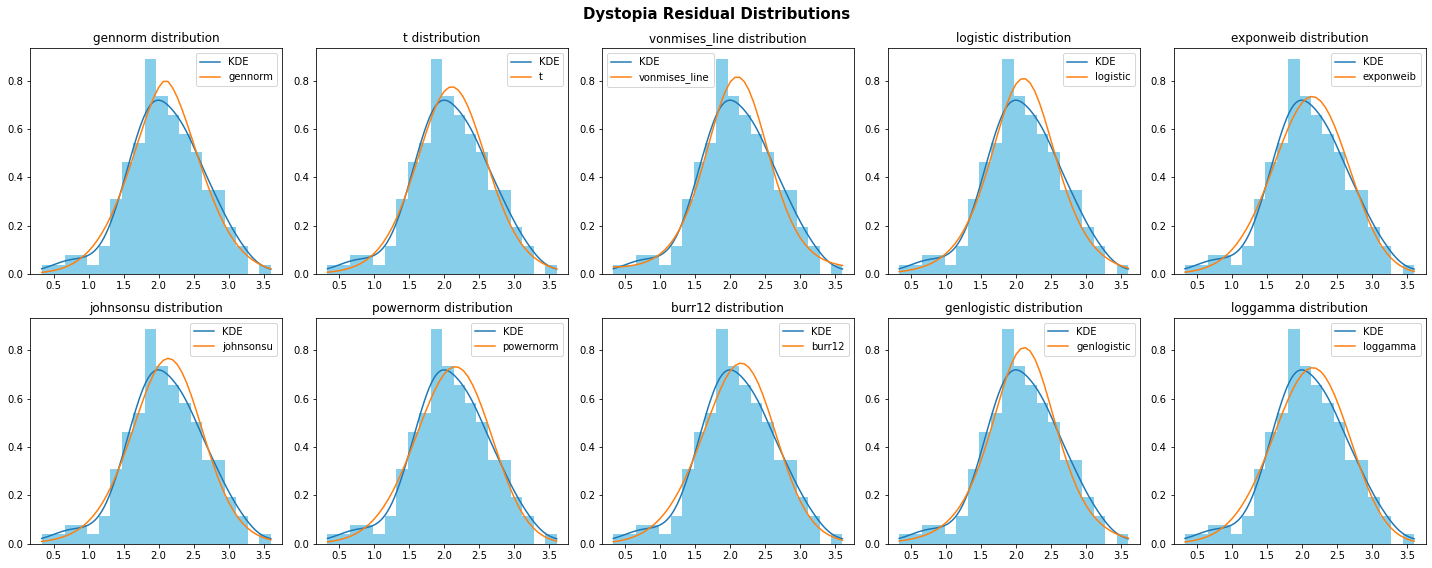

In [49]:
columns = happiness.columns
df_dist = [top_happiness, top_trust, top_generosity, top_dystopia]

for i, col in enumerate(columns):

    feature = happiness[col]
    fig_row = 2
    fig_col = 5

    figsize = (20,8)
    fig, ax = plt.subplots(fig_row, fig_col, figsize=figsize, sharey=False)
    fig.suptitle('{} Distributions'.format(col), fontsize=15, fontweight='bold')

    axs = trim_axs(ax, len(df_dist[i]))

    x = np.linspace(np.min(feature), np.max(feature))
    density = scipy.stats.kde.gaussian_kde(feature)
    xgrid = np.linspace(feature.min(), feature.max(), 100)

    for ax, row in zip(axs, df_dist[i].iterrows()):

        row = row[1]
        dist = getattr(scipy.stats, row['distribution'])
        params = row['{}_params'.format(columns[i])]

        # plot default KDE
        ax.plot(xgrid, density(xgrid), label='KDE')
        ax.hist(feature, bins=20, density=True, color='skyblue')

        # plot theoritical distribution 
        ax.plot(x, dist.pdf(x, *params), label='{}'.format(row['distribution']))

        # set plot title
        ax.set_title('{} distribution'.format(row['distribution']))    

        # enable legend
        ax.legend()

        # set ylim
        # ax.set_ylim(0,20)

plt.tight_layout()
plt.show()

## Estimate Parameter using MLE and MM

Happiness
MLE: (0.21914098497054085, 5.375734628705192, 1.1438530440703445)
MM: (0.09686497160649743, 5.375734434953253, 1.1413796585330944)



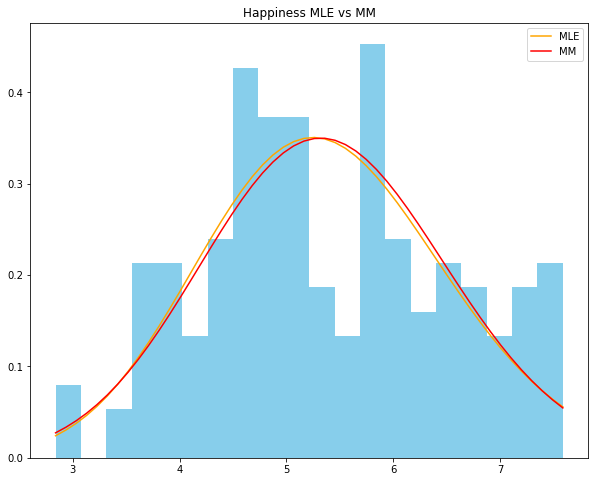

Trust (Government Corruption)
MLE: (7.042216549157098, 0.01957650060534706, 0.017586121892087893)
MM: (1.87169249497938, 0.03788691390233606, 0.05638487269742383)



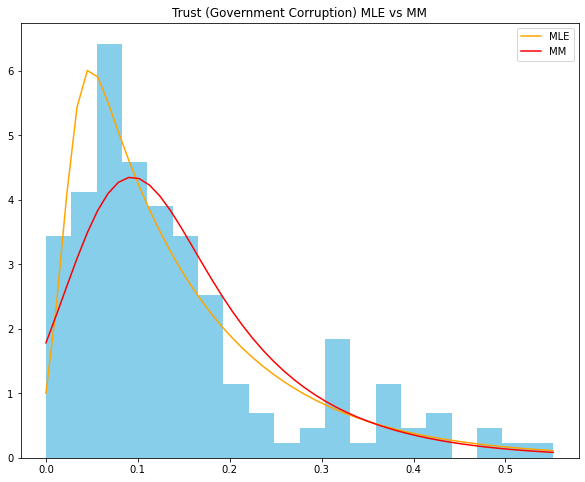

Generosity
MLE: (1.730290706799063, 0.12467192832020335, 0.06508860131281473)
MM: (1.2958709480593336, 0.137318738630466, 0.07715031322350147)



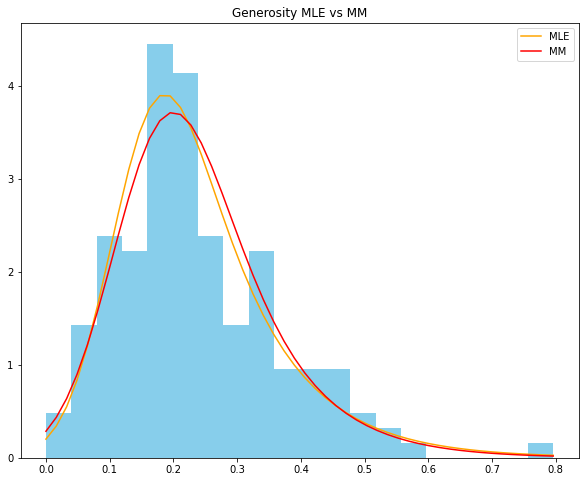

Dystopia Residual
MLE: (2.104002896874141, 0.30890149751042834)
MM: (2.098976772151899, 0.3042206777601633)


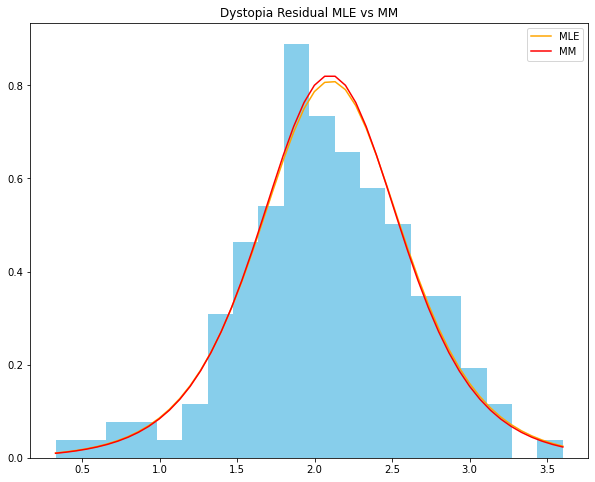

In [22]:
from scipy.stats import pearson3, logistic, exponnorm, lognorm

happiness_MLE = pearson3.fit(happiness['Happiness Score'], method='MLE')
happiness_MM = pearson3.fit(happiness['Happiness Score'], method='MM')

trust_MLE = exponnorm.fit(happiness['Trust (Government Corruption)'], method='MLE')
trust_MM = exponnorm.fit(happiness['Trust (Government Corruption)'], method='MM')

generosity_MLE = exponnorm.fit(happiness['Generosity'], method='MLE')
generosity_MM = exponnorm.fit(happiness['Generosity'], method='MM')

dystopia_MLE = logistic.fit(happiness['Dystopia Residual'], method='MLE')
dystopia_MM = logistic.fit(happiness['Dystopia Residual'], method='MM')

print('Happiness')
print(f'MLE: {happiness_MLE}\nMM: {happiness_MM}', end='\n\n')
xgrid = np.linspace(happiness['Happiness Score'].min(), happiness['Happiness Score'].max())
plt.figure(figsize=(10,8))
plt.hist(happiness['Happiness Score'], density=True, bins=20, color='skyblue')
plt.plot(xgrid, pearson3.pdf(xgrid, happiness_MLE[0], happiness_MLE[1], happiness_MLE[2]), label='MLE', color='orange')
plt.plot(xgrid, pearson3.pdf(xgrid, happiness_MM[0], happiness_MM[1], happiness_MM[2]), label='MM', color='red')
plt.title('Happiness MLE vs MM')
plt.legend()
plt.show()


print('Trust (Government Corruption)')
print(f'MLE: {trust_MLE}\nMM: {trust_MM}', end='\n\n')
xgrid = np.linspace(happiness['Trust (Government Corruption)'].min(), happiness['Trust (Government Corruption)'].max())
plt.figure(figsize=(10,8))
plt.hist(happiness['Trust (Government Corruption)'], density=True, bins=20, color='skyblue')
plt.plot(xgrid, exponnorm.pdf(xgrid, trust_MLE[0], trust_MLE[1], trust_MLE[2]), label='MLE', color='orange')
plt.plot(xgrid, exponnorm.pdf(xgrid, trust_MM[0], trust_MM[1], trust_MM[2]), label='MM', color='red')
plt.title('Trust (Government Corruption) MLE vs MM')
plt.legend()
plt.show()

print('Generosity')
print(f'MLE: {generosity_MLE}\nMM: {generosity_MM}', end='\n\n')
xgrid = np.linspace(happiness['Generosity'].min(), happiness['Generosity'].max())
plt.figure(figsize=(10,8))
plt.hist(happiness['Generosity'], density=True, bins=20, color='skyblue')
plt.plot(xgrid, exponnorm.pdf(xgrid, generosity_MLE[0], generosity_MLE[1], generosity_MLE[2]), label='MLE', color='orange')
plt.plot(xgrid, exponnorm.pdf(xgrid, generosity_MM[0], generosity_MM[1], generosity_MM[2]), label='MM', color='red')
plt.title('Generosity MLE vs MM')
plt.legend()
plt.show()

print('Dystopia Residual')
print(f'MLE: {dystopia_MLE}\nMM: {dystopia_MM}')
xgrid = np.linspace(happiness['Dystopia Residual'].min(), happiness['Dystopia Residual'].max())
plt.figure(figsize=(10,8))
plt.hist(happiness['Dystopia Residual'], density=True, bins=20, color='skyblue')
plt.plot(xgrid, logistic.pdf(xgrid, dystopia_MLE[0], dystopia_MLE[1]), label='MLE', color='orange')
plt.plot(xgrid, logistic.pdf(xgrid, dystopia_MM[0], dystopia_MM[1]), label='MM', color='red')
plt.title('Dystopia Residual MLE vs MM')
plt.legend()
plt.show()

Validate estimated parameters using QQ-biplot
=============================================

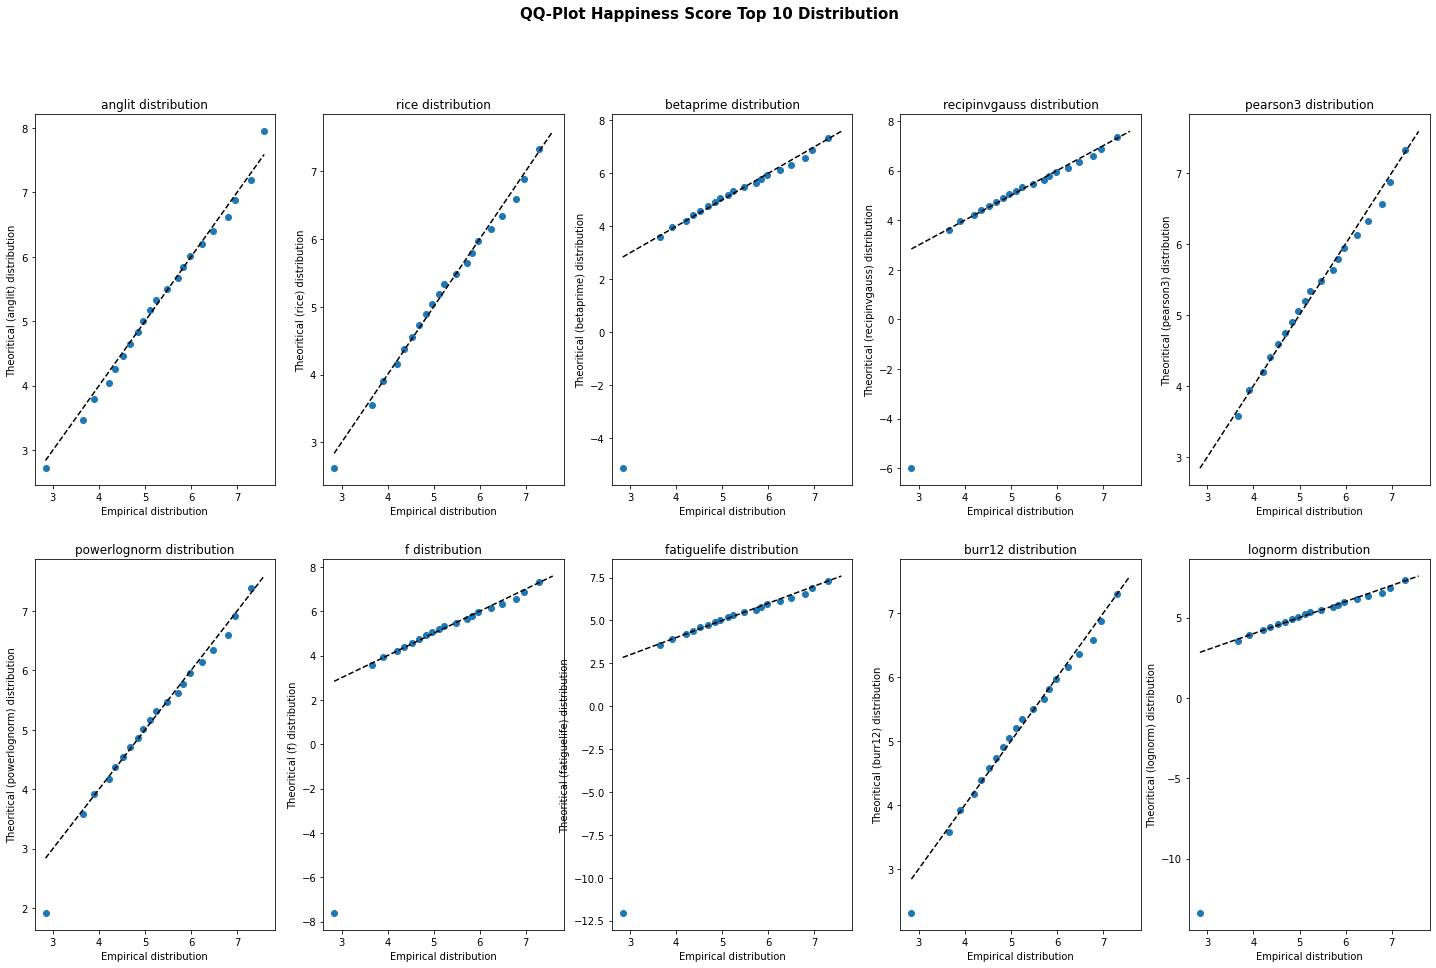

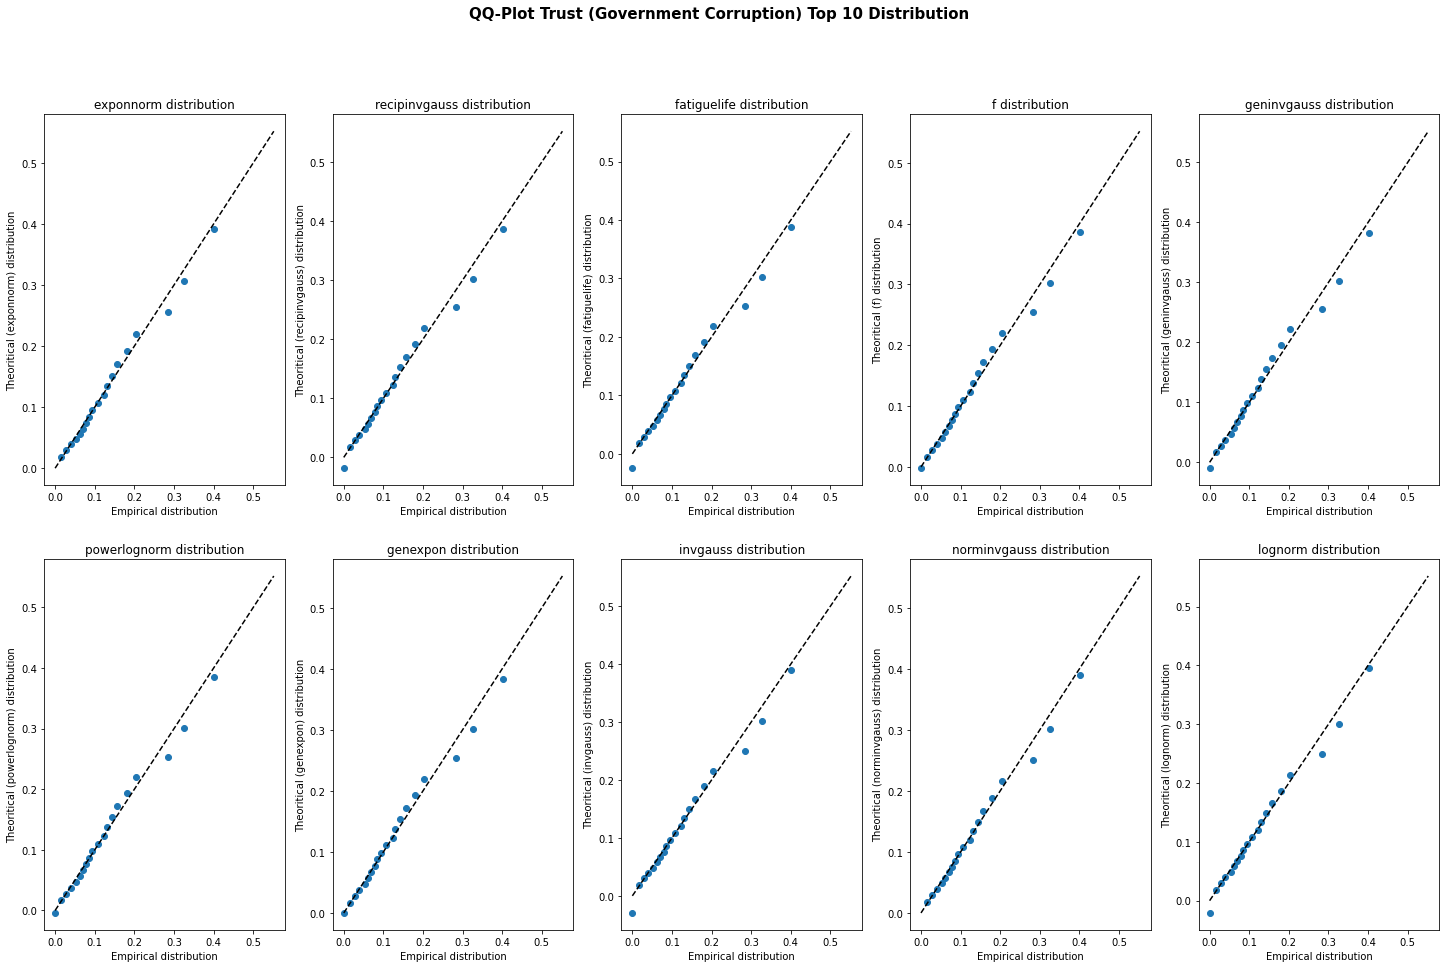

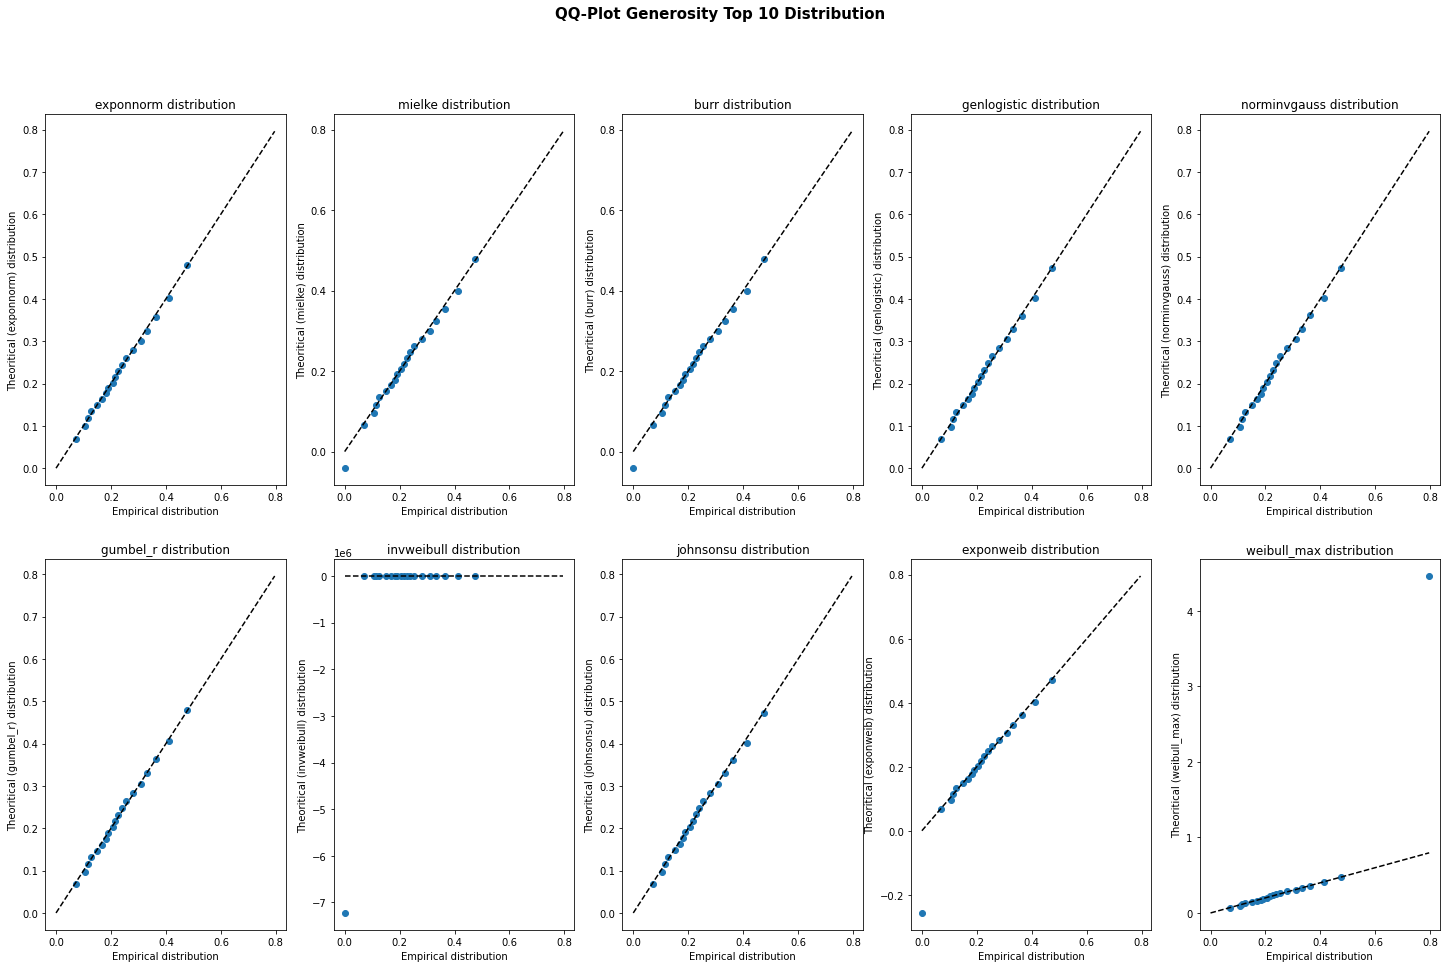

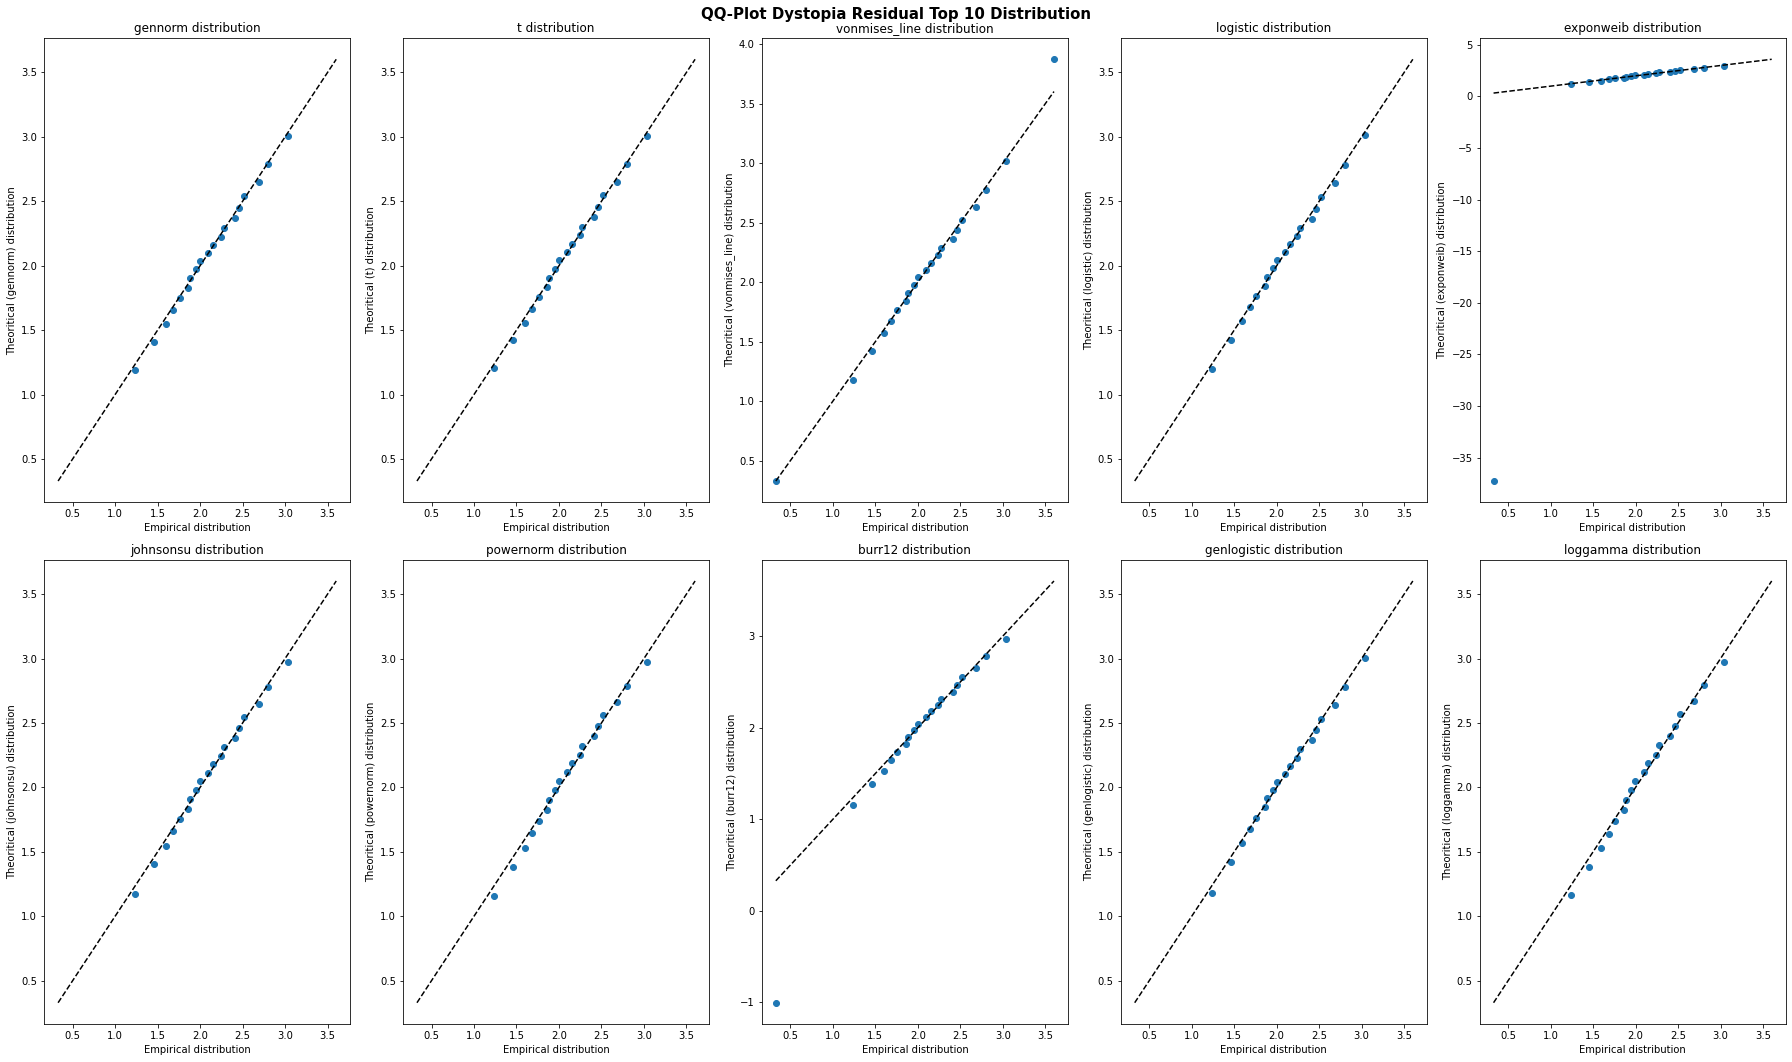

In [53]:
columns = happiness.columns
df_dist = [top_happiness, top_trust, top_generosity, top_dystopia]

for i, col in enumerate(columns):

    feature = happiness[col]
    fig_row = 2
    fig_col = 5

    figsize = (25,15)
    fig, ax = plt.subplots(fig_row, fig_col, figsize=figsize, sharey=False)
    fig.suptitle('QQ-Plot {} Top 10 Distribution'.format(col), fontsize=15, fontweight='bold')

    axs = trim_axs(ax, len(df_dist[i]))

    # percentile data
    percs = np.linspace(0,100,21)
    qn_feature = np.percentile(feature, percs)    
    x = np.linspace(np.min(feature), np.max(feature))
    
    for ax, row in zip(axs, df_dist[i].iterrows()):

        row = row[1]
        dist = getattr(scipy.stats, row['distribution'])
        params = row['{}_params'.format(columns[i])]
        
        # theoritical distribution percentile
        qn_dist = dist.ppf(percs / 100.0, *params)

        # plot QQ-Plot
        ax.plot(qn_feature, qn_dist, ls='', marker='o')
        ax.plot(x, x, color='k', ls='--')

        # set XY label
        ax.set_xlabel('Empirical distribution')
        ax.set_ylabel('Theoritical ({}) distribution'.format(row['distribution']))    
        
        # set plot title
        # ax.text(0,ax.get_ylim()[1] - 0.05, 'p-value: {:.4f}'.format(row[columns[i]+'_kstest']))
        # ax.text(0,ax.get_ylim()[1] - 0.1, 'chi2: {:.4f}'.format(row[columns[i]+'_chi2']))        
        
        # 'p-value: {:.2f}'.format(row[columns[i]+'_kstest'])
        ax.set_title('{} distribution'.format(row['distribution']))  

plt.tight_layout()
plt.show()

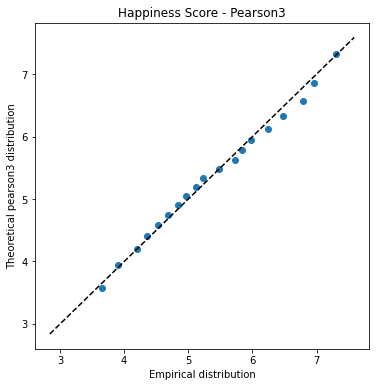

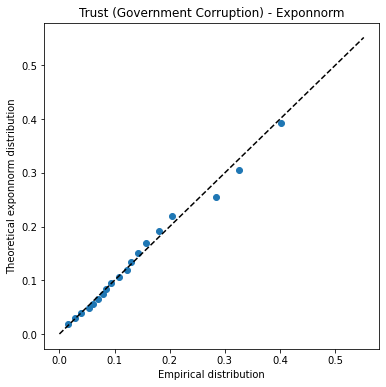

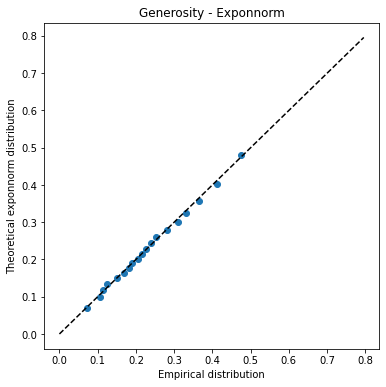

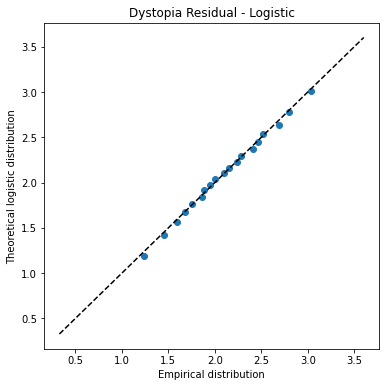

In [27]:
feature = happiness['Happiness Score']

# percentile data
percs = np.linspace(0,100,21)
qn_feature = np.percentile(feature, percs)    
x = np.linspace(np.min(feature), np.max(feature))
#theoretical distribution percentile
qn_dist = pearson3.ppf(percs / 100.0, *happiness_MLE)

plt.figure(figsize=(6,6))
plt.title('Happiness Score - Pearson3')
plt.plot(qn_feature, qn_dist, ls='', marker='o')
plt.plot(x, x, color='k', ls='--')
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical pearson3 distribution')
plt.show()


feature = happiness['Trust (Government Corruption)']

# percentile data
percs = np.linspace(0,100,21)
qn_feature = np.percentile(feature, percs)    
x = np.linspace(np.min(feature), np.max(feature))
#theoretical distribution percentile
qn_dist = exponnorm.ppf(percs / 100.0, *trust_MLE)

plt.figure(figsize=(6,6))
plt.title('Trust (Government Corruption) - Exponnorm')
plt.plot(qn_feature, qn_dist, ls='', marker='o')
plt.plot(x, x, color='k', ls='--')
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical exponnorm distribution')
plt.show()


feature = happiness['Generosity']

# percentile data
percs = np.linspace(0,100,21)
qn_feature = np.percentile(feature, percs)    
x = np.linspace(np.min(feature), np.max(feature))
#theoretical distribution percentile
qn_dist = exponnorm.ppf(percs / 100.0, *generosity_MLE)

plt.figure(figsize=(6,6))
plt.title('Generosity - Exponnorm')
plt.plot(qn_feature, qn_dist, ls='', marker='o')
plt.plot(x, x, color='k', ls='--')
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical exponnorm distribution')
plt.show()


feature = happiness['Dystopia Residual']

# percentile data
percs = np.linspace(0,100,21)
qn_feature = np.percentile(feature, percs)    
x = np.linspace(np.min(feature), np.max(feature))
#theoretical distribution percentile
qn_dist = logistic.ppf(percs / 100.0, *dystopia_MLE)

plt.figure(figsize=(6,6))
plt.title('Dystopia Residual - Logistic')
plt.plot(qn_feature, qn_dist, ls='', marker='o')
plt.plot(x, x, color='k', ls='--')
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical logistic distribution')
plt.show()




Correctness of fitted distribution
==================================

In [93]:
# happiness
happiness_dist = top_happiness[top_happiness['distribution'] == 'pearson3']
print('Happiness Score variable - {}'.format(happiness_dist['distribution'].values[0]))
print('kstest p-value: ', happiness_dist['Happiness Score_kstest'].values[0])
print('chi2 p-value: ', happiness_dist['Happiness Score_chi2'].values[0])
print()

# trust
trust_dist = top_trust[top_trust['distribution'] == 'pearson3']
print('Trust (Government Corruption) variable - {}'.format(trust_dist['distribution'].values[0]))
print('kstest p-value: ', trust_dist['Trust (Government Corruption)_kstest'].values[0])
print('chi2 p-value: ', trust_dist['Trust (Government Corruption)_chi2'].values[0])
print()

# generosity
generosity_dist = top_generosity[top_generosity['distribution'] == 'pearson3']
print('Generosity variable - {}'.format(generosity_dist['distribution'].values[0]))
print('kstest p-value: ', generosity_dist['Generosity_kstest'].values[0])
print('chi2 p-value: ', generosity_dist['Generosity_chi2'].values[0])
print()

# dystopia
dystopia_dist = top_dystopia[top_dystopia['distribution'] == 'pearson3']
print('Dystopia Residual variable - {}'.format(dystopia_dist['distribution'].values[0]))
print('kstest p-value: ', dystopia_dist['Dystopia Residual_kstest'].values[0])
print('chi2 p-value: ', dystopia_dist['Dystopia Residual_chi2'].values[0])
print()

Happiness Score variable - pearson3
kstest p-value:  0.8554529788826716
chi2 p-value:  1.0

Trust (Government Corruption) variable - pearson3
kstest p-value:  0.7119991223824389
chi2 p-value:  1.0

Generosity variable - pearson3
kstest p-value:  0.7712166025708957
chi2 p-value:  1.0

Dystopia Residual variable - pearson3
kstest p-value:  0.8386510220053941
chi2 p-value:  1.0

